In [2]:
from keras.models import Model
from keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob 
import scipy as sp

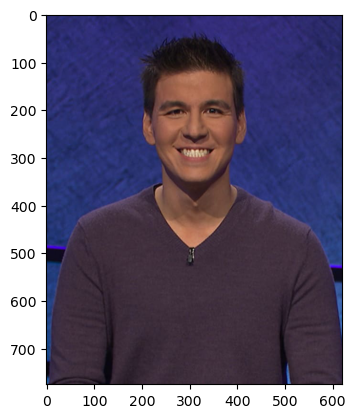

In [4]:
# showing image for fun
plt.imshow(image.load_img("C:/Users/hp/Documents/visualize_activaion_maps/test.jpg"))
plt.show()
     

In [5]:


# downloading and initializing Resnet50 Model
resnet = ResNet50(input_shape=(224,224,3),weights = 'imagenet',include_top = True)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [6]:

resnet.summary()
     

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [9]:
for layer in resnet.layers:
    print(layer.name)


input_layer
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
co

In [10]:
activation_layer = resnet.get_layer('conv5_block3_out')  # Example


In [12]:
model = Model(inputs=resnet.input, outputs=activation_layer.output)


In [14]:
last_dense_layer = resnet.get_layer('predictions')


In [16]:
# Reading and preprocessing the image for Resnet

img = image.load_img("C:/Users/hp/Documents/visualize_activaion_maps/football.jpg",target_size=(224,224))
x = preprocess_input(np.expand_dims(img,0))
# get the featuremaps frorm the model we created above 
featuremaps = model.predict(x)[0] #7x7x2048 feature map

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [17]:
# predict the category of input image from 1000 classes of resnet50
probs = resnet.predict(x)
classnames = decode_predictions(probs)[0]
print(classnames)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
[('n04254680', 'soccer_ball', 0.9948036), ('n03445777', 'golf_ball', 0.00076657406), ('n04118538', 'rugby_ball', 0.00045972125), ('n03134739', 'croquet_ball', 0.00033298475), ('n04409515', 'tennis_ball', 0.0002498795)]


In [18]:
classname = classnames[0][1] #get highest probabilty score for the image
preds = np.argmax(probs[0]) # get maximum probability value along an axis
print(classname)
print(preds)

soccer_ball
805


In [20]:
# Get the last dense layer (adjust name if needed)
last_dense_layer = resnet.get_layer('predictions')

# Extract the weights from the layer
weights = last_dense_layer.get_weights()[0]  # This gives the weight matrix

# Make sure 'preds' is defined before using it
w = weights[:, preds]  # preds should be an integer index or a properly defined variable



In [21]:

# perform a dot product of feature maps and weights
product = featuremaps.dot(w)

# Now upsample the image to 224,224
# 7x32= 224
product = sp.ndimage.zoom(product,(32,32),order=1)

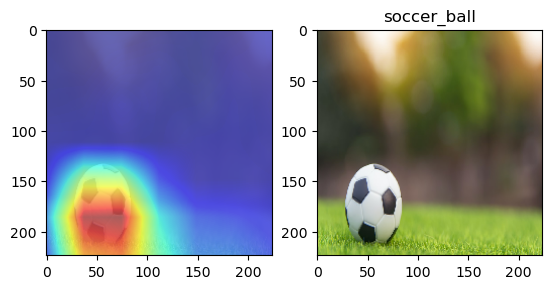

In [22]:

#plotting the results
plt.subplot(1,2,1)
plt.imshow(img,alpha=0.4)
plt.imshow(product,cmap='jet',alpha=0.6)
plt.subplot(1,2,2)
plt.imshow(img)
plt.title(classname)
plt.show()